In [1]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

In [1]:
from keras.preprocessing.image import ImageDataGenerator

In [2]:
from PIL import Image

In [3]:
img = Image.open(r"C:\Users\teoht\OneDrive\Library\AI\Data\Pneumonia\train\NORMAL\IM-0115-0001.jpeg")

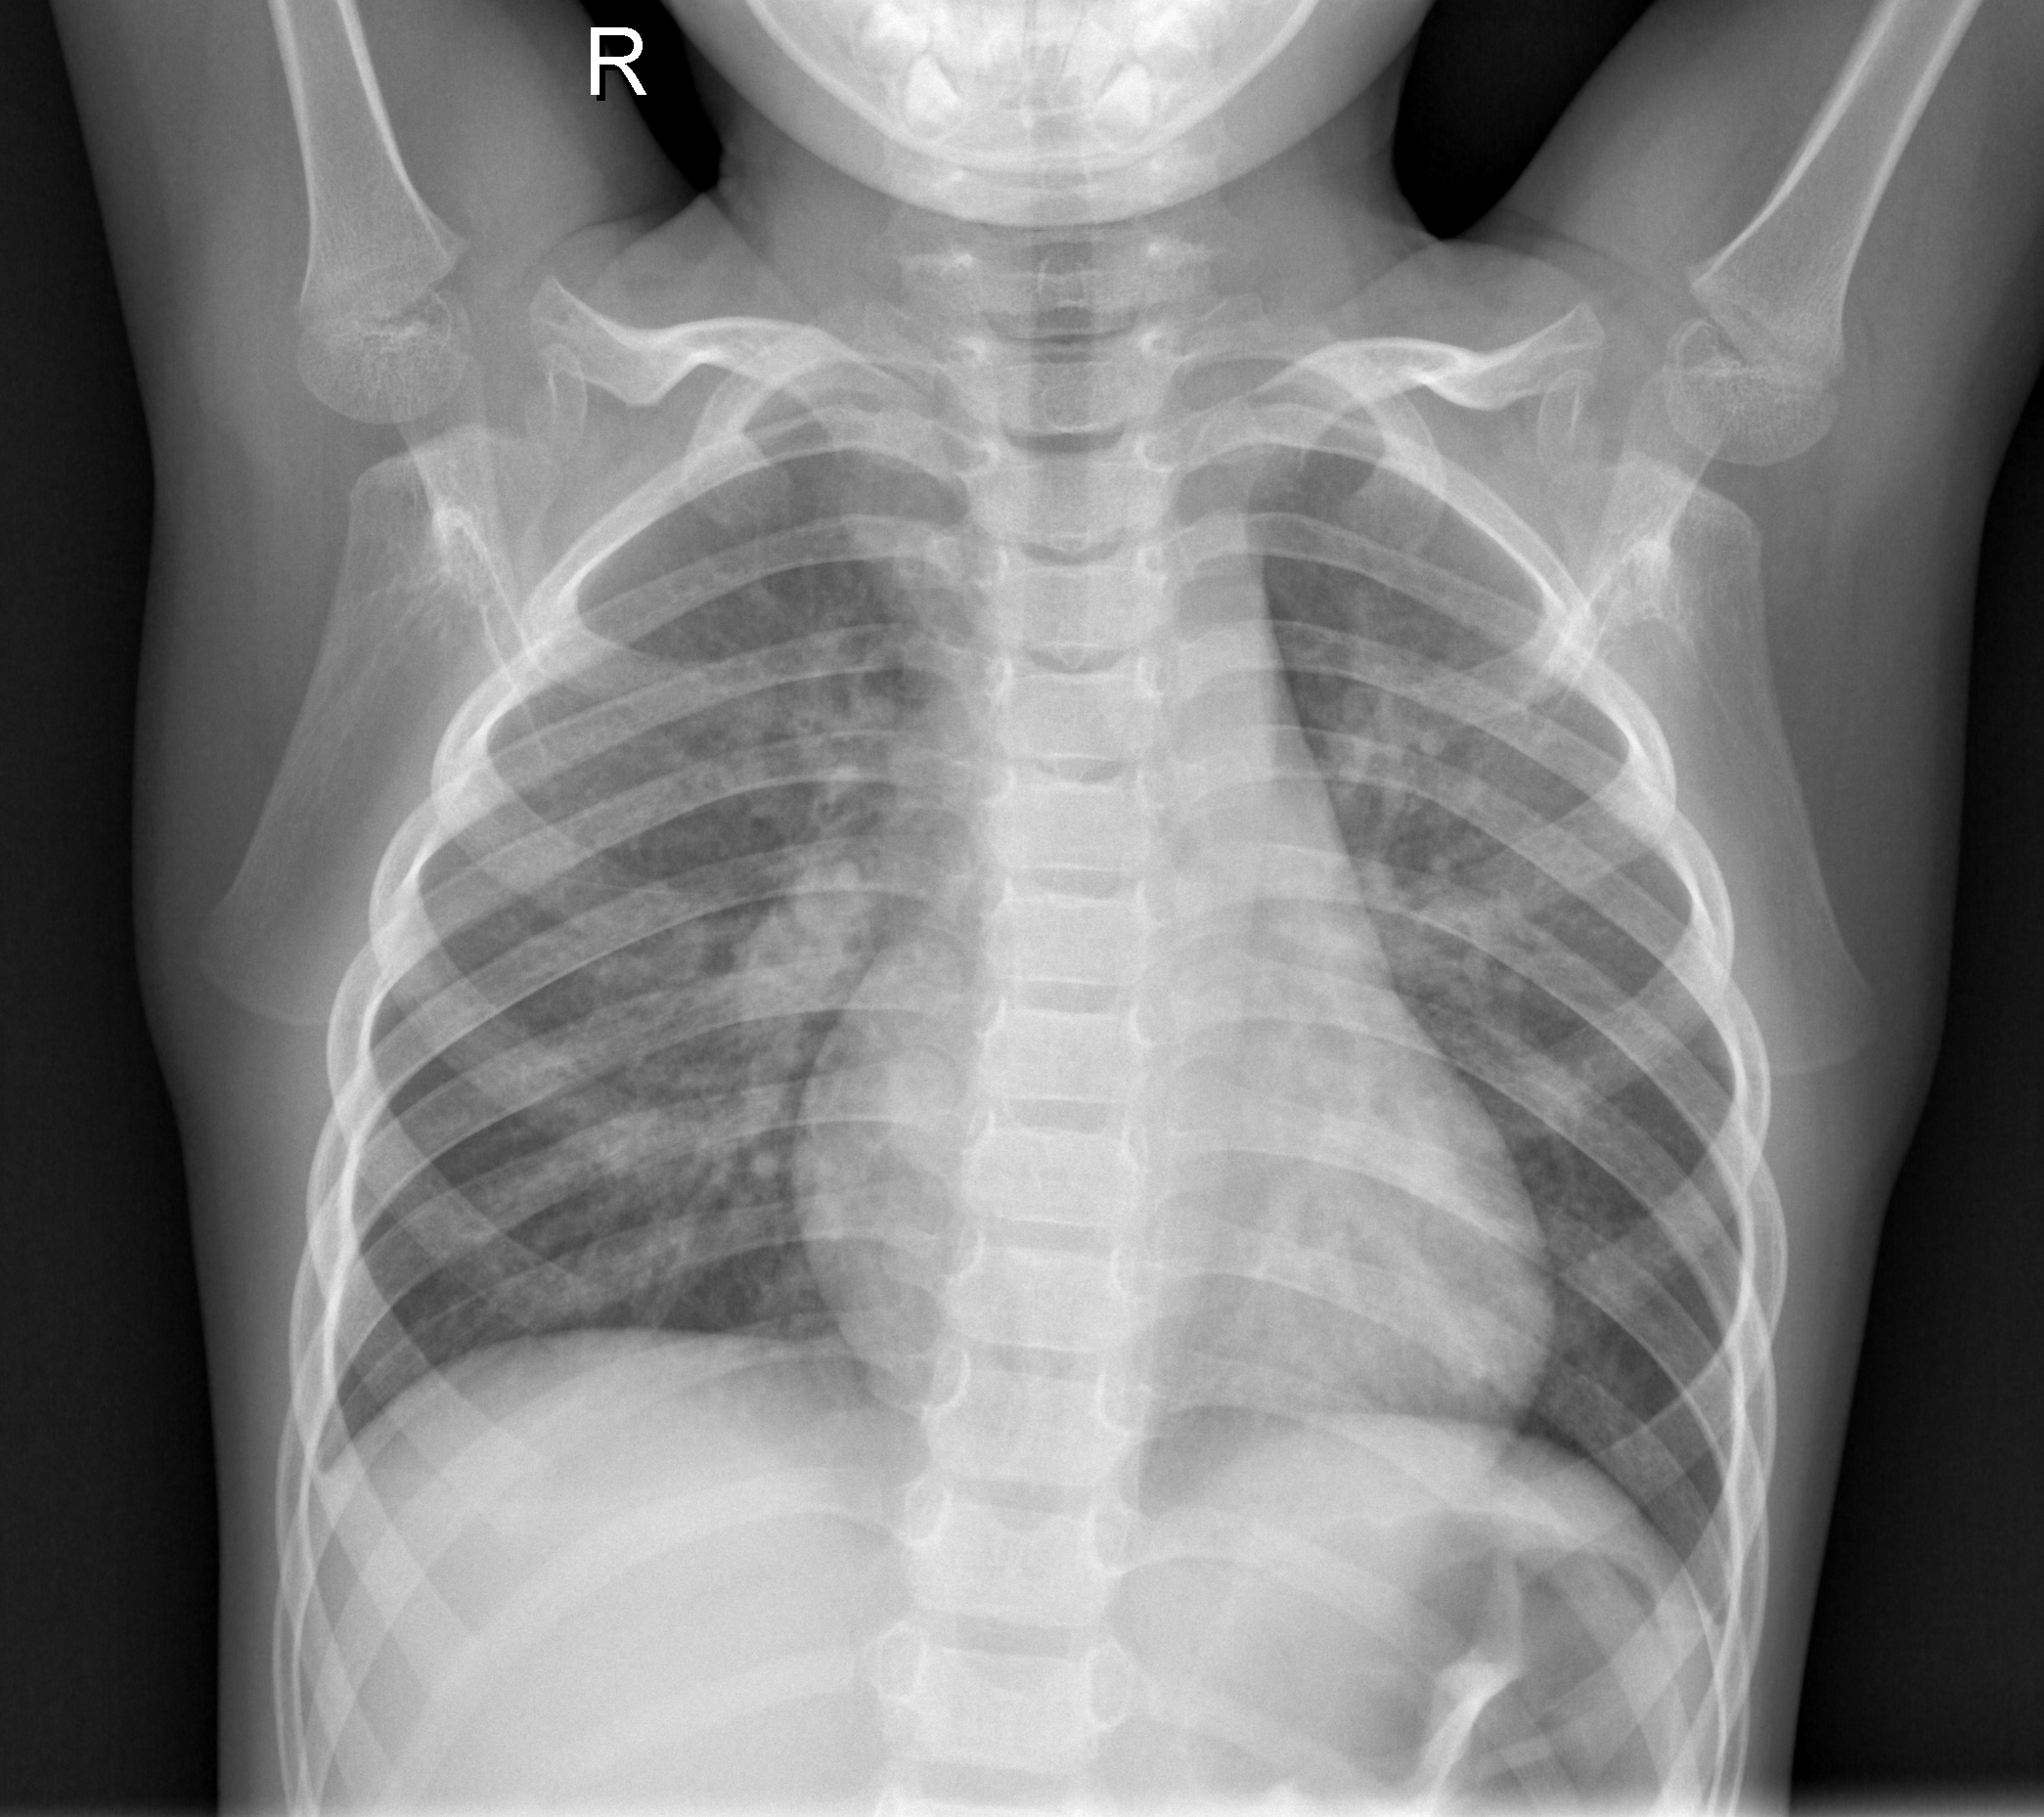

In [4]:
img

In [5]:
img.histogram

<bound method Image.histogram of <PIL.JpegImagePlugin.JpegImageFile image mode=L size=2090x1858 at 0x2578AC77450>>

In [6]:
train_dir = r"C:\Users\teoht\OneDrive\Library\AI\Data\Pneumonia\train"

In [7]:
test_dir = r"C:\Users\teoht\OneDrive\Library\AI\Data\Pneumonia\test"

In [8]:
train_data = ImageDataGenerator().flow_from_directory(train_dir,(150,150),batch_size=5,shuffle=False)

Found 5216 images belonging to 2 classes.


In [9]:
test_data = ImageDataGenerator().flow_from_directory(test_dir,(150,150),batch_size=5,shuffle=False)

Found 624 images belonging to 2 classes.


In [10]:
from keras.models import Sequential

In [11]:
from keras.layers import Dense,Dropout,Conv2D,MaxPool2D,Flatten

In [12]:
model = Sequential()

In [13]:
model.add(Conv2D(32,(3,3),input_shape=(150,150,3),activation="relu"))

In [14]:
model.add(MaxPool2D(pool_size=(2,2),strides=2))

In [15]:
model.add(Dropout(0.1))

In [16]:
model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.1))

In [17]:
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.1))

In [18]:
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.1))

In [19]:
model.add(Flatten())

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 36, 36, 32)        0

In [21]:
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2))

In [22]:
model.add(Dense(2,activation="softmax"))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 36, 36, 32)        0

In [24]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [25]:
h = model.fit(train_data,batch_size=5,epochs=5)

Epoch 1/5
1044/1044 [==============================] - 242s 229ms/step - loss: 8.9947 - accuracy: 0.7860
Epoch 2/5
1044/1044 [==============================] - 217s 207ms/step - loss: 0.2612 - accuracy: 0.8972
Epoch 3/5
1044/1044 [==============================] - 191s 183ms/step - loss: 0.2586 - accuracy: 0.9068
Epoch 4/5
1044/1044 [==============================] - 186s 178ms/step - loss: 0.2202 - accuracy: 0.9235
Epoch 5/5
1044/1044 [==============================] - 188s 180ms/step - loss: 0.1774 - accuracy: 0.9362


In [26]:
import matplotlib.pyplot as plt

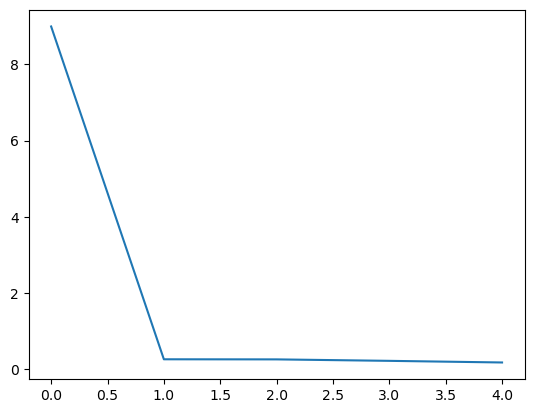

In [27]:
plt.plot(h.history["loss"])

In [28]:
model.evaluate(test_data)

125/125 [==============================] - 18s 139ms/step - loss: 1.1941 - accuracy: 0.7179


[1.1941136121749878, 0.7179487347602844]

In [30]:
pred = model.predict(test_data)

125/125 [==============================] - 10s 80ms/step


In [32]:
import numpy as np

In [33]:
pred = np.argmax(pred,axis=1)

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
cm = confusion_matrix(test_data.classes,pred)

In [38]:
cm

array([[ 60, 174],
       [  2, 388]], dtype=int64)

In [39]:
print("accuracy is ", (cm[0,0]+cm[1,1])/(sum(sum(cm))))

accuracy is  0.717948717948718
